<a href="https://colab.research.google.com/github/benyuanben/-data_analytics_2-/blob/main/Python/Unit4-Machine_Learning/Unit4_MiniProject_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group #4:  Ben Pu, Adnaan Syed, Natalia Russu, Carolina Valencia, Kadiatou Diallo, Michelle Orna, Walter Broncano, Bolaji Oke


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

#Importing the file
location = 'https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv'

df = pd.read_csv(location)


#**Overview**


In [ ]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
df.shape

(101766, 50)

In [ ]:
#Replacing all unknown data with null values
df.replace("?", np.nan, inplace=True )
df.replace("Unknown/Invalid", np.nan, inplace=True )
df['admission_type_id'].replace(6,np.nan,inplace=True)
df['discharge_disposition_id'].replace(18, np.nan, inplace=True)
df['admission_source_id'].replace(17, np.nan, inplace=True)

In [ ]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id            5291
discharge_disposition_id     3691
admission_source_id          6781
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Text(0.5, 1.0, 'NaN Data')

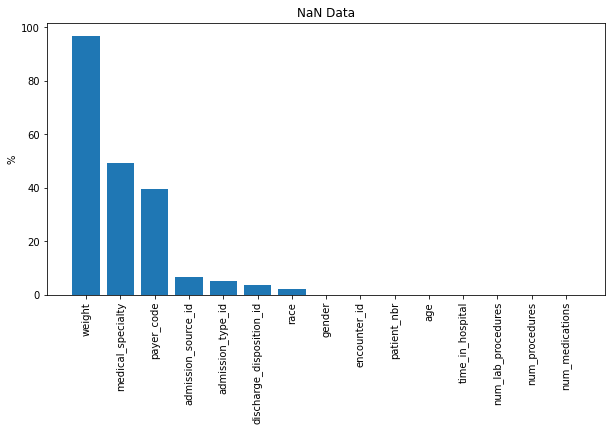

In [ ]:
plt.figure(figsize=(10, 5))
missing = pd.DataFrame({'column':df.iloc[:, :-35].columns, 'na_percent':df.iloc[:, :-35].isnull().sum()/len(df)*100})
missing.sort_values('na_percent', ascending=False, inplace=True)
plt.bar(missing['column'], missing['na_percent'])
plt.ylabel('%')
plt.xticks(rotation=90)
plt.title('NaN Data')

#**Data Exploration (EDA)**

1. By gender, amount of drug admininstered
2. diabetes by age group,gender, race
3. frequency of each drug type administered





In [ ]:
df['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

In [ ]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [ ]:
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [ ]:
df1 = df[['gender','num_medications']]
df1.groupby(['gender']).sum()
#This shows that females have a higher sum of medications compared to males

,num_medications
gender,
Female,885607
Male,744823


In [ ]:
df1.groupby(['gender']).mean()  

,num_medications
gender,
Female,16.187888
Male,15.828775


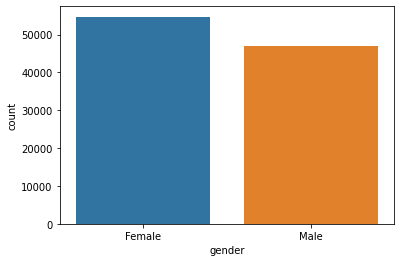

In [ ]:
#Visualizing the difference in num of medications between males and females    
sns.countplot(x=df1['gender'], data=df1)


In [ ]:
df.loc[:, 'diabetesMed'] = df.loc[:, 'diabetesMed'].replace(
    {
        'No': 0,
       'Yes': 1
    }
)

In [ ]:
#Diabetes Medication in relation to age, gender, and race
df2 = df[['diabetesMed','age','gender','race']]
df2

,diabetesMed,age,gender,race
0,0,[0-10),Female,Caucasian
1,1,[10-20),Female,Caucasian
2,1,[20-30),Female,AfricanAmerican
3,1,[30-40),Male,Caucasian
4,1,[40-50),Male,Caucasian
...,...,...,...,...
101761,1,[70-80),Male,AfricanAmerican
101762,1,[80-90),Female,AfricanAmerican
101763,1,[70-80),Male,Caucasian
101764,1,[80-90),Female,Caucasian


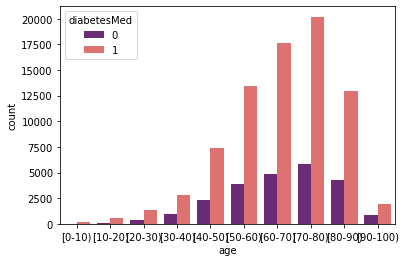

In [ ]:
#Diabetes Medication in relation to age
#This shows that people who are older tend to take more diabetes medication
sns.countplot(x='age', data=df2, hue='diabetesMed', palette='magma')

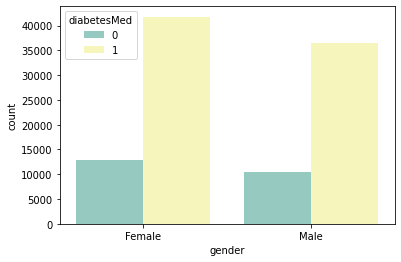

In [ ]:
#Females take more diabetes medication than males, but that might be due to 
#the higher amount of females in the data
sns.countplot(x='gender', data=df2, hue='diabetesMed', palette='Set3')

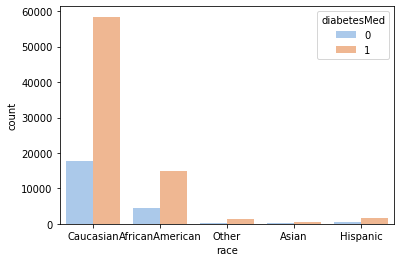

In [ ]:
#Caucasions have more diabetes medication compared to other races, but that may
#be due to the fact that there are more caucasion patients than other patients
sns.countplot(x='race', data=df2, hue='diabetesMed', palette='pastel')

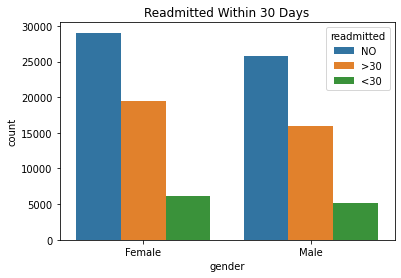

In [ ]:
#Graph shows the readmittance rate between males and females
sns.countplot(x='gender', data=df, hue='readmitted')
plt.title('Readmitted Within 30 Days')
plt.show()

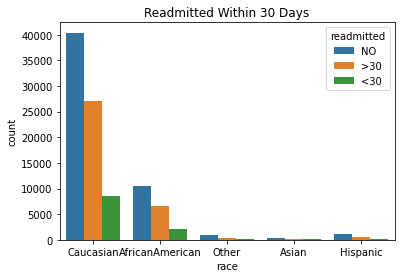

In [ ]:
#Graph shows the readmittance rate between races
sns.countplot(x='race', data=df, hue='readmitted')
plt.title('Readmitted Within 30 Days')
plt.show()

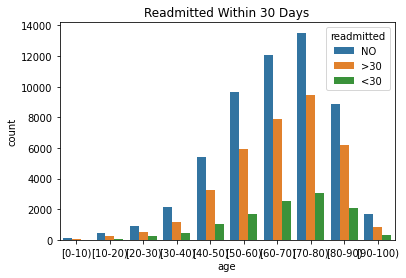

In [ ]:
#Graph shows the readmittance rate between ages
sns.countplot(x='age', data=df, hue='readmitted')
plt.title('Readmitted Within 30 Days')
plt.show()

#**Data Preparation (Wrangling/Cleaning)**

**OUR GOAL IS TO SEE IF WE CAN PREDICT IF THE PATIENT IS GOING TO BE READMITTED WITHOUT KNOWING ANY OF THE DRUGS THEY ARE TAKING**

Want to get rid of null values such as weight, medical specialties, paycode, etc.

Want to keep race, gender, age, and other important data

In [ ]:
#Dropping all unneccesary columns
df.drop(['patient_nbr','encounter_id','weight','payer_code','medical_specialty','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
                     'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','max_glu_serum','A1Cresult',
                     'acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','diag_1','diag_2','diag_3',
                     'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','insulin'],axis=1, inplace=True)

In [ ]:
#changing all non-numeric columns to numerics so we can process it in the model
df.race.replace({'Caucasian':1,'AfricanAmerican':2, 'Hispanic':3, 'Asian':4,'Other':5, np.nan:0},inplace=True)
df.gender.replace({'Female': 0, 'Male': 1}, inplace=True)
df.readmitted.replace({'NO': 0, '>30': 0, '<30': 1}, inplace=True)
df.age.replace({ '[0-10)':0, '[10-20)':0, '[20-30)':0, '[30-40)':1, '[40-50)':1, '[50-60)':1, '[60-70)':2, '[70-80)':2, '[80-90)':2, '[90-100)':2}, inplace=True)
df.diabetesMed.replace({'No':0,'Yes':1},inplace=True)
df.change.replace({'No':0,'Ch':1},inplace=True)

In [ ]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted
0,1,0.0,0,NaN,25.0,1.0,1,41,0,1,0,0,0,1,0,0,0
1,1,0.0,0,1.0,1.0,7.0,3,59,0,18,0,0,0,9,1,1,0
2,2,0.0,0,1.0,1.0,7.0,2,11,5,13,2,0,1,6,0,1,0
3,1,1.0,1,1.0,1.0,7.0,2,44,1,16,0,0,0,7,1,1,0
4,1,1.0,1,1.0,1.0,7.0,1,51,0,8,0,0,0,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,2,1.0,2,1.0,3.0,7.0,3,51,0,16,0,0,0,9,1,1,0
101762,2,0.0,2,1.0,4.0,5.0,5,33,3,18,0,0,1,9,0,1,0
101763,1,1.0,2,1.0,1.0,7.0,1,53,0,9,1,0,0,13,1,1,0
101764,1,0.0,2,2.0,3.0,7.0,10,45,2,21,0,0,1,9,1,1,0


In [ ]:
df.isnull().sum()

race                           0
gender                         3
age                            0
admission_type_id           5291
discharge_disposition_id    3691
admission_source_id         6781
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
number_diagnoses               0
change                         0
diabetesMed                    0
readmitted                     0
dtype: int64

In [ ]:
#will also drop all null values becuase they are insignificant because we have alot of data left
df.dropna(inplace=True)

In [ ]:
df.shape

(88969, 17)

#**Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
y = df['readmitted']
X= df.drop('readmitted', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66726, 16), (22243, 16), (66726,), (22243,))

##Logistic Regression Model

In [ ]:
# Import LogisticRegression from sklearn's linear_model
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression as log
log = LogisticRegression(solver='liblinear',random_state=88)

In [ ]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=88, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logPredict = log.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, logPredict))

Accuracy: 0.8896731555995144


In [ ]:
print(classification_report(y_test,logPredict))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     19793
           1       0.48      0.02      0.03      2450

    accuracy                           0.89     22243
   macro avg       0.68      0.51      0.49     22243
weighted avg       0.85      0.89      0.84     22243



In [ ]:
print(confusion_matrix(y_test, logPredict))


[[19750    43]
 [ 2411    39]]


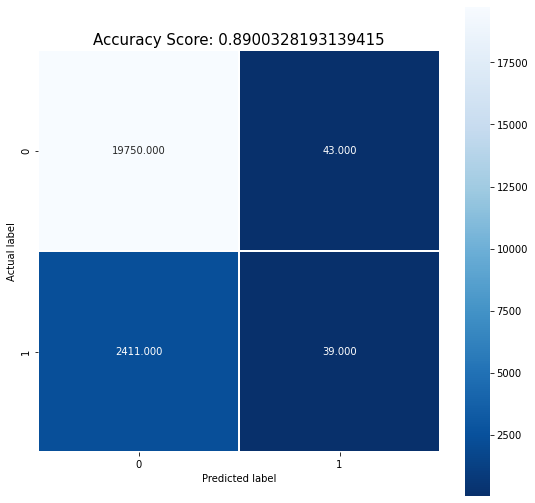

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, logPredict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(log.score(x_test, y_test))
plt.title(all_sample_title, size = 15);

##KNN Model



In [ ]:
from sklearn.neighbors import KNeighborsClassifier


[0.8647214854111406, 0.8897630715281212, 0.8900328193139415, 0.8901227352425483, 0.8900328193139415]




Text(0, 0.5, 'Testing Accuracy')

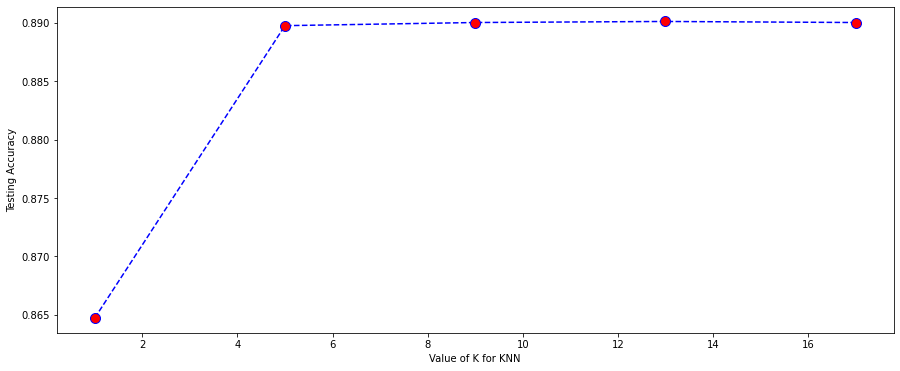

In [ ]:
score =[]

# Run for k from 1 to 39
# Pssing the value of K to KNeighborsClassifier
# and calculating the acuracy score (y_test vs y_predect)
for i in range(1,20,4):
  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_pred))
  #append() appends a passed obj (matrics.accuracy) into the existing list.(score)

print(str(score)+"\n\n")


plt.figure(figsize=(15,6))
plt.plot(range(1,20,4),score, color='blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

Accuracy: 0.8900328193139415


In [ ]:
print(classification_report(y_test,knn_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     19793
           1       0.52      0.03      0.05      2450

    accuracy                           0.89     22243
   macro avg       0.70      0.51      0.50     22243
weighted avg       0.85      0.89      0.84     22243



In [ ]:
print(confusion_matrix(y_test, knn_pred))


[[19729    64]
 [ 2382    68]]


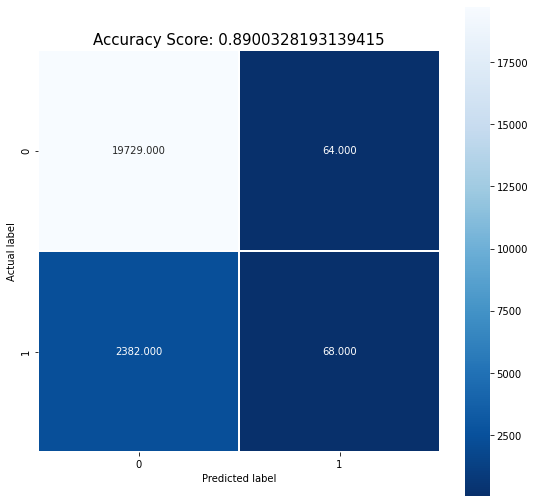

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(log.score(x_test, y_test))
plt.title(all_sample_title, size = 15);

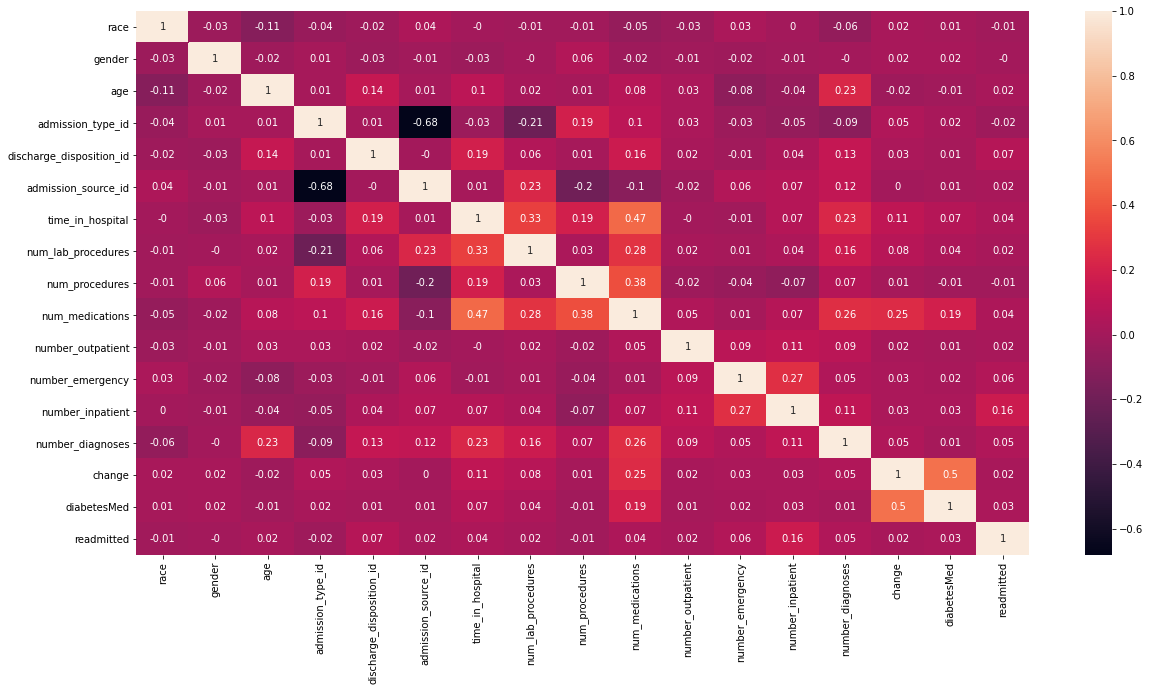

In [ ]:
correlation_matrix = df.corr().round(2)
#A correlation matrix is a table showing correlation coefficients between variables.

plt.figure(figsize=(20,10))


# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix , annot = True )